In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設你的資料存放在一個 CSV 檔案中
# 讀取資料，請將 'your_file.csv' 替換為你的檔案名稱
rolling_predictions = pd.read_csv(r'C:\Users\User\Desktop\quant\Sector Allocation Framework under Reinforcement Learning Rotation\industry-rotation\industryRL_v4\rolling_predictions6.csv')

In [2]:
rolling_predictions

,train_start,train_end,predict_start,predict_end,rank1_industry,rank1_return,rank2_industry,rank2_return,rank3_industry,rank3_return,rank4_industry,rank4_return,rank5_industry,rank5_return,actual_best_industry,best_return,window_number,window_start,window_end
0,2013-06-06,2013-11-26,2013-11-27,2014-01-08,數位雲端,-1.408850,汽車工業,12.166437,生技醫療,3.196317,化學工業,4.637786,其他,7.247991,文化創意業,21.702690,0,0,120
1,2013-07-19,2014-01-08,2014-01-09,2014-02-27,數位雲端,1.625871,汽車工業,6.061600,化學工業,3.781357,居家生活,1.694889,文化創意業,15.428515,文化創意業,15.428515,1,30,150
2,2013-09-02,2014-02-27,2014-03-03,2014-04-14,金融業,-1.036323,汽車工業,-0.165432,電機機械,0.760340,航運業,-1.952636,居家生活,2.657374,文化創意業,9.827300,2,60,180
3,2013-10-16,2014-04-14,2014-04-15,2014-05-27,生技醫療,8.388760,資訊服務業,-2.264907,電子零組件,2.399773,航運業,-3.588609,綠能環保,0.481100,生技醫療,8.388760,3,90,210
4,2013-11-27,2014-05-27,2014-05-28,2014-07-09,文化創意業,5.812025,通信網路業,5.193287,電腦及週邊,7.344176,電子通路業,9.528255,半導體,7.750409,生技醫療,10.846314,4,120,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2023-05-12,2023-11-03,2023-11-06,2023-12-15,電腦及週邊,9.764083,電子通路業,6.788837,油電燃氣業,0.589550,鋼鐵工業,11.161724,綠能環保,14.064049,綠能環保,14.064049,81,2430,2550
82,2023-06-27,2023-12-15,2023-12-18,2024-01-29,電腦及週邊,2.177371,金融業,-1.823588,半導體,1.099753,食品工業,-1.021325,電子零組件,0.264237,電子通路業,7.387506,82,2460,2580
83,2023-08-09,2024-01-29,2024-01-30,2024-03-21,化學工業,4.569117,通信網路業,5.994046,半導體,3.917585,建材營造,11.446869,電子零組件,8.344291,建材營造,11.446869,83,2490,2610
84,2023-09-20,2024-03-21,2024-03-22,2024-05-07,其他,4.639586,電機機械,5.126221,建材營造,25.012828,通信網路業,0.905338,資訊服務業,-2.656341,建材營造,25.012828,84,2520,2640


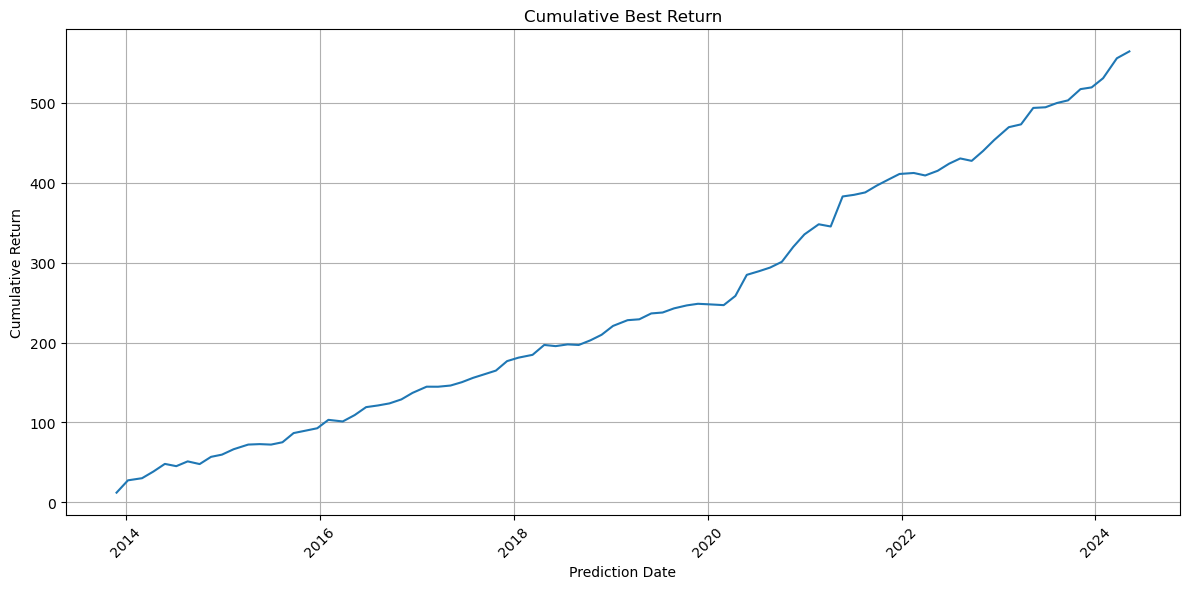

In [16]:
rolling_predictions['best_predicted_return'] = rolling_predictions.apply(
   lambda x: max([x['rank1_return'], x['rank2_return'], x['rank3_return'], 
                 x['rank4_return'], x['rank5_return']]),
   axis=1
)

# 計算累積最高報酬
rolling_predictions['cumulative_best_return'] = rolling_predictions['best_predicted_return'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(rolling_predictions['predict_start'], rolling_predictions['cumulative_best_return'])
plt.title('Cumulative Best Return')
plt.xlabel('Prediction Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
print(list(rolling_predictions['actual_best_industry']) )

['文化創意業', '文化創意業', '文化創意業', '生技醫療', '生技醫療', '鋼鐵工業', '生技醫療', '觀光餐旅', '數位雲端', '綠能環保', '數位雲端', '金融業', '文化創意業', '油電燃氣業', '生技醫療', '綠能環保', '生技醫療', '綠能環保', '文化創意業', '綠能環保', '文化創意業', '綠能環保', '汽車工業', '材料', '鋼鐵工業', '光電業', '數位雲端', '半導體', '文化創意業', '半導體', '光電業', '半導體', '綠能環保', '鋼鐵工業', '電腦及週邊', '生技醫療', '半導體', '油電燃氣業', '金融業', '油電燃氣業', '光電業', '通信網路業', '半導體', '資訊服務業', '食品工業', '半導體', '文化創意業', '半導體', '數位雲端', '半導體', '化學工業', '數位雲端', '觀光餐旅', '生技醫療', '材料', '光電業', '汽車工業', '航運業', '半導體', '半導體', '航運業', '航運業', '綠能環保', '數位雲端', '化學工業', '文化創意業', '綠能環保', '鋼鐵工業', '食品工業', '汽車工業', '通信網路業', '生技醫療', '食品工業', '觀光餐旅', '數位雲端', '資訊服務業', '資訊服務業', '觀光餐旅', '電腦及週邊', '半導體', '文化創意業', '綠能環保', '電子通路業', '建材營造', '建材營造', '光電業']
